In [1]:
library(SingleCellExperiment)
library(dplyr)
library(ggplot2)
library(nichenetr)
library(multinichenetr)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

In [2]:
organism = "human"

In [3]:
options(timeout = 120)

if(organism == "human"){
  
  lr_network_all = 
    readRDS(url(
      "https://zenodo.org/record/10229222/files/lr_network_human_allInfo_30112033.rds"
      )) %>% 
    mutate(
      ligand = convert_alias_to_symbols(ligand, organism = organism), 
      receptor = convert_alias_to_symbols(receptor, organism = organism))
  
  lr_network_all = lr_network_all  %>% 
    mutate(ligand = make.names(ligand), receptor = make.names(receptor)) 
  
  lr_network = lr_network_all %>% 
    distinct(ligand, receptor)
  
  ligand_target_matrix = readRDS(url(
    "https://zenodo.org/record/7074291/files/ligand_target_matrix_nsga2r_final.rds"
    ))
  
  colnames(ligand_target_matrix) = colnames(ligand_target_matrix) %>% 
    convert_alias_to_symbols(organism = organism) %>% make.names()
  rownames(ligand_target_matrix) = rownames(ligand_target_matrix) %>% 
    convert_alias_to_symbols(organism = organism) %>% make.names()
  
  lr_network = lr_network %>% filter(ligand %in% colnames(ligand_target_matrix))
  ligand_target_matrix = ligand_target_matrix[, lr_network$ligand %>% unique()]
  
} else if(organism == "mouse"){
  
  lr_network_all = readRDS(url(
    "https://zenodo.org/record/10229222/files/lr_network_mouse_allInfo_30112033.rds"
    )) %>% 
    mutate(
      ligand = convert_alias_to_symbols(ligand, organism = organism), 
      receptor = convert_alias_to_symbols(receptor, organism = organism))
  
  lr_network_all = lr_network_all  %>% 
    mutate(ligand = make.names(ligand), receptor = make.names(receptor)) 
  lr_network = lr_network_all %>% 
    distinct(ligand, receptor)
  
  ligand_target_matrix = readRDS(url(
    "https://zenodo.org/record/7074291/files/ligand_target_matrix_nsga2r_final_mouse.rds"
    ))
  
  colnames(ligand_target_matrix) = colnames(ligand_target_matrix) %>% 
    convert_alias_to_symbols(organism = organism) %>% make.names()
  rownames(ligand_target_matrix) = rownames(ligand_target_matrix) %>% 
    convert_alias_to_symbols(organism = organism) %>% make.names()
  
  lr_network = lr_network %>% filter(ligand %in% colnames(ligand_target_matrix))
  ligand_target_matrix = ligand_target_matrix[, lr_network$ligand %>% unique()]
  
}

[1] "following are the official gene symbols of input aliases: "
  symbol alias
1  YARS1  YARS
[1] "all input symbols were official symbols"
[1] "all input symbols were official symbols"
[1] "all input symbols were official symbols"


In [4]:
sce = readRDS("tutorial/imp_sce_subset_misc.rds")
#sce = alias_to_symbol_SCE(sce, "human") %>% makenames_SCE()

[1] "there are provided symbols that are not in the alias annotation table: "
   [1] "AL627309.1"  "AL669831.5"  "AL645608.8"  "AL645608.2"  "AL162741.1" 
   [6] "AL391244.3"  "AL645728.1"  "AL691432.2"  "FO704657.1"  "AL109917.1" 
  [11] "AL590822.2"  "AL139246.5"  "AL139246.3"  "AL513320.1"  "AL805961.2" 
  [16] "AL365255.1"  "AL031848.2"  "Z98884.1"    "AL034417.4"  "AL034417.3" 
  [21] "AL096855.1"  "AL139424.2"  "AL354956.1"  "AL139423.1"  "AL109811.3" 
  [26] "AL109811.1"  "AL109811.2"  "AC243836.1"  "AC254633.1"  "AL031283.1" 
  [31] "AL121992.3"  "AL121992.1"  "AL450998.2"  "AL137802.2"  "AL021920.3" 
  [36] "BX284668.2"  "BX284668.5"  "BX284668.6"  "AL035413.1"  "AL031727.2" 
  [41] "AL020998.1"  "AL031005.1"  "AL031728.1"  "AL031281.2"  "AL445686.2" 
  [46] "AL445471.1"  "AL445471.2"  "AL031432.5"  "AL031432.3"  "AL606491.1" 
  [51] "AL031280.1"  "AL020996.1"  "AL033528.2"  "AL391650.1"  "AL512408.1" 
  [56] "BX293535.1"  "AL512288.1"  "AL353622.1"  "AL353622.2"  "AL360012.1"

In [5]:
sce

class: SingleCellExperiment 
dim: 20332 13343 
metadata(0):
assays(2): counts logcounts
rownames(20332): AL627309.1 AL669831.5 ... PLAC4 AP001059.2
rowData names(0):
colnames(13343): STA008_AAACCTGAGACACTAA-1 STA008_AAACCTGAGGCTAGCA-1
  ... STA015_TTTGTCATCAATCTCT-1 STA015_TTTGTCATCGTTGACA-1
colData names(178): cell orig.ident ... MATCH ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(2): HTO SCT

In [6]:
sample_id = "ShortID"
group_id = "MIS.C.AgeTier"
celltype_id = "Annotation_v2.0"

In [7]:
covariates = NA
batches = NA

In [8]:
#sce@colData

In [9]:
contrasts_oi = c("'M-(S+A)/2','S-(M+A)/2','A-(S+M)/2'")

In [10]:
contrast_tbl = tibble(contrast = 
                        c("M-(S+A)/2","S-(M+A)/2", "A-(S+M)/2"), 
                      group = c("M","S","A"))

In [11]:
#SummarizedExperiment::colData(sce)

In [12]:
names(SummarizedExperiment::colData(sce))

[1] "cell"                               "orig.ident"                        
  [3] "nCount_RNA"                         "nFeature_RNA"                      
  [5] "nCount_HTO"                         "nFeature_HTO"                      
  [7] "HTOmaxval"                          "HTO_maxID"                         
  [9] "HTO_secondID"                       "HTO_margin"                        
 [11] "HTO_classification"                 "HTO_classification.global"         
 [13] "hash.ID"                            "MULTI_ID"                          
 [15] "MULTI_classification"               "freemuxlet_type"                   
 [17] "freemuxlet_guess"                   "freemuxlet_label"                  
 [19] "subsample"                          "sum"                               
 [21] "detected"                           "percent_top_50"                    
 [23] "percent_top_100"                    "percent_top_200"                   
 [25] "percent_top_500"                    "subsets_Mito_sum"                  
 [27] "subsets_Mito_detected"              "subsets_Mito_percent"              
 [29] "subsets_RBC_sum"                    "subsets_RBC_detected"              
 [31] "subsets_RBC_percent"                "subsets_COVID_sum"                 
 [33] "subsets_COVID_detected"             "subsets_COVID_percent"             
 [35] "total"                              "sizeFactor"                        
 [37] "nCount_SCT"                         "nFeature_SCT"                      
 [39] "SCT_snn_res.0.8"                    "seurat_clusters"                   
 [41] "SCT_snn_res.0"                      "SCT_snn_res.0.1"                   
 [43] "SCT_snn_res.0.2"                    "SCT_snn_res.0.3"                   
 [45] "SCT_snn_res.0.4"                    "SCT_snn_res.0.5"                   
 [47] "SCT_snn_res.0.6"                    "SCT_snn_res.0.7"                   
 [49] "SCT_snn_res.0.9"                    "SCT_snn_res.1"                     
 [51] "SCT_clusters"                       "fzero"                             
 [53] "pca.drop"                           "pANN_0.25_0.03_176"                
 [55] "DF.classifications_0.25_0.03_176"   "DF.classifications_0.25_0.03_159"  
 [57] "DF.classifications_0.25_0.03_2636"  "DF.classifications_0.25_0.03_2388" 
 [59] "DFPrediction"                       "batch"                             
 [61] "pANN_0.25_0.06_160"                 "DF.classifications_0.25_0.06_160"  
 [63] "DF.classifications_0.25_0.06_146"   "DF.classifications_0.25_0.06_2400" 
 [65] "DF.classifications_0.25_0.06_2192"  "pANN_0.25_0.24_169"                
 [67] "DF.classifications_0.25_0.24_169"   "DF.classifications_0.25_0.24_156"  
 [69] "DF.classifications_0.25_0.24_2538"  "DF.classifications_0.25_0.24_2336" 
 [71] "pANN_0.25_0.001_137"                "DF.classifications_0.25_0.001_137" 
 [73] "DF.classifications_0.25_0.001_127"  "DF.classifications_0.25_0.001_2059"
 [75] "DF.classifications_0.25_0.001_1904" "pANN_0.25_0.13_190"                
 [77] "DF.classifications_0.25_0.13_190"   "DF.classifications_0.25_0.13_176"  
 [79] "DF.classifications_0.25_0.13_2843"  "DF.classifications_0.25_0.13_2636" 
 [81] "pANN_0.25_0.07_205"                 "DF.classifications_0.25_0.07_205"  
 [83] "DF.classifications_0.25_0.07_190"   "DF.classifications_0.25_0.07_3070" 
 [85] "DF.classifications_0.25_0.07_2849"  "pANN_0.25_0.22_180"                
 [87] "DF.classifications_0.25_0.22_180"   "DF.classifications_0.25_0.22_166"  
 [89] "DF.classifications_0.25_0.22_2696"  "DF.classifications_0.25_0.22_2481" 
 [91] "pANN_0.25_0.09_164"                 "DF.classifications_0.25_0.09_164"  
 [93] "DF.classifications_0.25_0.09_154"   "DF.classifications_0.25_0.09_2460" 
 [95] "DF.classifications_0.25_0.09_2307"  "PCA_merged_snn_res.1.3"            
 [97] "HTOmval"                            "HTO_mID"                           
 [99] "freemlet_type"                      "freemlet_guess"                    
[1

In [13]:
#my_data %>% select(Sepal.Length, Petal.Length)

In [14]:
#col_data <-SummarizedExperiment::colData(sce) 
#col_data[['orig.ident']]

In [15]:
senders_oi = SummarizedExperiment::colData(sce)[,celltype_id] %>% unique()
receivers_oi = SummarizedExperiment::colData(sce)[,celltype_id] %>% unique()
sce = sce[, SummarizedExperiment::colData(sce)[,celltype_id] %in% 
            c(senders_oi, receivers_oi)
          ]

In [16]:
senders_oi

[1] "L_T_TIM3._CD38._HLADR." "L_NK_CD56._CD16."       "M_Monocyte_CD16"

In [17]:
receivers_oi

[1] "L_T_TIM3._CD38._HLADR." "L_NK_CD56._CD16."       "M_Monocyte_CD16"

In [18]:
conditions_keep = c("M", "S", "A")
sce = sce[, SummarizedExperiment::colData(sce)[,group_id] %in% 
            conditions_keep
          ]

In [19]:
min_cells = 10

In [20]:
abundance_info = get_abundance_info(
  sce = sce, 
  sample_id = sample_id, group_id = group_id, celltype_id = celltype_id, 
  min_cells = min_cells, 
  senders_oi = senders_oi, receivers_oi = receivers_oi, 
  batches = batches
  )

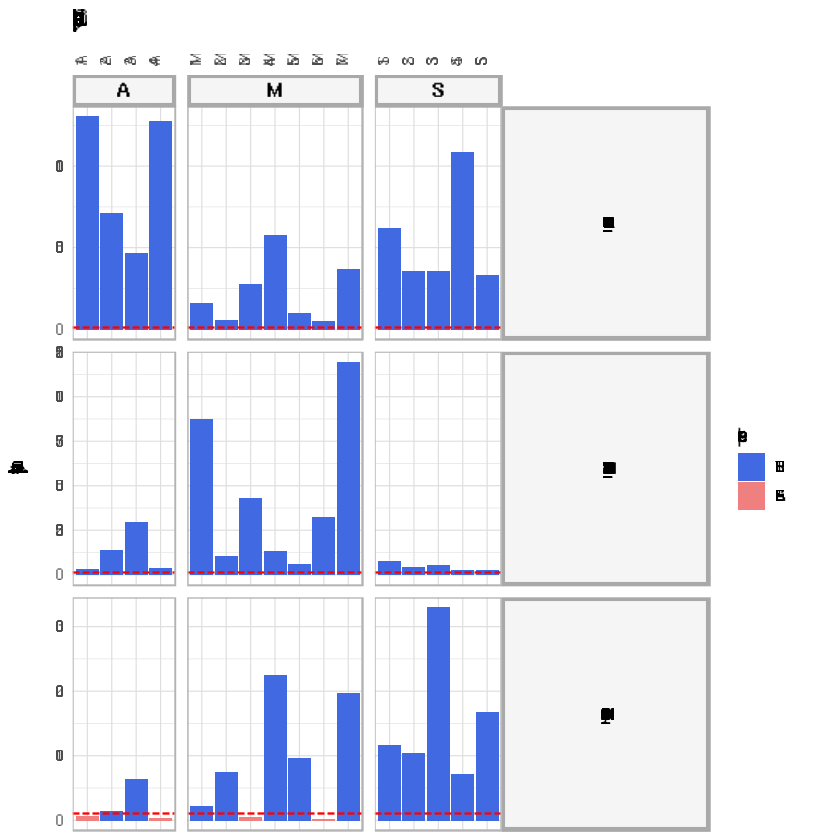

In [21]:
abundance_info$abund_plot_sample

In [22]:
sample_group_celltype_df = abundance_info$abundance_data %>%
  filter(n > min_cells) %>%
  ungroup() %>%
  distinct(sample_id, group_id) %>%
  cross_join(
    abundance_info$abundance_data %>%
      ungroup() %>%
      distinct(celltype_id)
    ) %>%
  arrange(sample_id)

abundance_df = sample_group_celltype_df %>% left_join(
  abundance_info$abundance_data %>% ungroup()
  )

abundance_df$n[is.na(abundance_df$n)] = 0
abundance_df$keep[is.na(abundance_df$keep)] = FALSE
abundance_df_summarized = abundance_df %>%
  mutate(keep = as.logical(keep)) %>%
  group_by(group_id, celltype_id) %>%
  summarise(samples_present = sum((keep)))

celltypes_absent_one_condition = abundance_df_summarized %>%
  filter(samples_present == 0) %>% pull(celltype_id) %>% unique()
# find truly condition-specific cell types by searching for cell types
# truely absent in at least one condition

celltypes_present_one_condition = abundance_df_summarized %>%
  filter(samples_present >= 2) %>% pull(celltype_id) %>% unique()
# require presence in at least 2 samples of one group so
# it is really present in at least one condition

condition_specific_celltypes = intersect(
  celltypes_absent_one_condition,
  celltypes_present_one_condition)

total_nr_conditions = SummarizedExperiment::colData(sce)[,group_id] %>%
  unique() %>% length()

absent_celltypes = abundance_df_summarized %>%
  filter(samples_present < 2) %>%
  group_by(celltype_id) %>%
  count() %>%
  filter(n == total_nr_conditions) %>%
  pull(celltype_id)

print("condition-specific celltypes:")
## [1] "condition-specific celltypes:"
print(condition_specific_celltypes)
## [1] "L_T_TIM3._CD38._HLADR."

print("absent celltypes:")
## [1] "absent celltypes:"
print(absent_celltypes)
## character(0)

Joining with `by = join_by(sample_id, group_id, celltype_id)`
`summarise()` has grouped output by 'group_id'. You can override using the `.groups` argument.


[1] "condition-specific celltypes:"
character(0)
[1] "absent celltypes:"
character(0)


In [23]:
analyse_condition_specific_celltypes = FALSE

if(analyse_condition_specific_celltypes == TRUE){
  senders_oi = senders_oi %>% setdiff(absent_celltypes)
  receivers_oi = receivers_oi %>% setdiff(absent_celltypes)
} else {
  senders_oi = senders_oi %>%
    setdiff(union(absent_celltypes, condition_specific_celltypes))
  receivers_oi = receivers_oi %>%
    setdiff(union(absent_celltypes, condition_specific_celltypes))
}

sce = sce[, SummarizedExperiment::colData(sce)[,celltype_id] %in%
            c(senders_oi, receivers_oi)
          ]

In [24]:

min_sample_prop = 0.50
fraction_cutoff = 0.05

frq_list = get_frac_exprs(
  sce = sce,
  sample_id = sample_id, celltype_id =  celltype_id, group_id = group_id,
  batches = batches,
  min_cells = min_cells,
  fraction_cutoff = fraction_cutoff, min_sample_prop = min_sample_prop)



genes_oi = frq_list$expressed_df %>%
  filter(expressed == TRUE) %>% pull(gene) %>% unique()
sce = sce[genes_oi, ]

Joining with `by = join_by(sample, group)`


[1] "Samples are considered if they have more than 10 cells of the cell type of interest"


Joining with `by = join_by(sample, celltype)`


[1] "Genes with non-zero counts in at least 5% of cells of a cell type of interest in a particular sample will be considered as expressed in that sample."
[1] "Genes expressed in at least 2 samples will considered as expressed in the cell type: L_NK_CD56._CD16."
[1] "Genes expressed in at least 2 samples will considered as expressed in the cell type: L_T_TIM3._CD38._HLADR."
[1] "Genes expressed in at least 2 samples will considered as expressed in the cell type: M_Monocyte_CD16"


Joining with `by = join_by(sample)`
Joining with `by = join_by(celltype)`
Joining with `by = join_by(sample, celltype, group)`


[1] "6621 genes are considered as expressed in the cell type: L_NK_CD56._CD16."
[1] "8461 genes are considered as expressed in the cell type: L_T_TIM3._CD38._HLADR."
[1] "8817 genes are considered as expressed in the cell type: M_Monocyte_CD16"


In [25]:
abundance_expression_info = process_abundance_expression_info(
  sce = sce,
  sample_id = sample_id, group_id = group_id, celltype_id = celltype_id,
  min_cells = min_cells,
  senders_oi = senders_oi, receivers_oi = receivers_oi,
  lr_network = lr_network,
  batches = batches,
  frq_list = frq_list,
  abundance_info = abundance_info)


Joining with `by = join_by(sender, receiver, ligand, receptor)`
Joining with `by = join_by(sender, receiver, ligand, receptor)`
Joining with `by = join_by(sender, receiver, ligand, receptor)`


In [26]:
abundance_expression_info$celltype_info$pb_df %>% head()

gene,sample,pb_sample,celltype
<chr>,<chr>,<dbl>,<fct>
A1BG,A1,3.099019,L_T_TIM3._CD38._HLADR.
AAAS,A1,4.012275,L_T_TIM3._CD38._HLADR.
AAGAB,A1,5.536369,L_T_TIM3._CD38._HLADR.
AAK1,A1,6.396638,L_T_TIM3._CD38._HLADR.
AAMDC,A1,4.567124,L_T_TIM3._CD38._HLADR.
AAMP,A1,5.536369,L_T_TIM3._CD38._HLADR.


In [27]:
abundance_expression_info$celltype_info$pb_df_group %>% head()

group,celltype,gene,pb_group
<chr>,<chr>,<chr>,<dbl>
A,L_NK_CD56._CD16.,A1BG,3.914193
A,L_NK_CD56._CD16.,AAAS,4.811414
A,L_NK_CD56._CD16.,AAGAB,4.820906
A,L_NK_CD56._CD16.,AAK1,7.026478
A,L_NK_CD56._CD16.,AAMDC,3.655781
A,L_NK_CD56._CD16.,AAMP,6.043661


In [28]:
abundance_expression_info$sender_receiver_info$pb_df %>% head()

sample,sender,receiver,ligand,receptor,pb_ligand,pb_receptor,ligand_receptor_pb_prod
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
M4,M_Monocyte_CD16,M_Monocyte_CD16,B2M,LILRB1,14.17803,11.44839,162.3156
M4,L_NK_CD56._CD16.,M_Monocyte_CD16,B2M,LILRB1,14.01098,11.44839,160.4031
M4,L_T_TIM3._CD38._HLADR.,M_Monocyte_CD16,B2M,LILRB1,13.78517,11.44839,157.8180
M5,L_NK_CD56._CD16.,M_Monocyte_CD16,B2M,LILRB1,14.49454,10.54458,152.8389
M5,M_Monocyte_CD16,M_Monocyte_CD16,B2M,LILRB1,14.38722,10.54458,151.7072
M5,L_T_TIM3._CD38._HLADR.,M_Monocyte_CD16,B2M,LILRB1,14.15294,10.54458,149.2369


In [29]:
abundance_expression_info$sender_receiver_info$pb_df_group %>% head()

group,sender,receiver,ligand,receptor,pb_ligand_group,pb_receptor_group,ligand_receptor_pb_prod_group
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
M,L_NK_CD56._CD16.,M_Monocyte_CD16,B2M,LILRB1,14.08501,10.014641,141.0563
M,M_Monocyte_CD16,M_Monocyte_CD16,B2M,LILRB1,14.07650,10.014641,140.9711
M,L_T_TIM3._CD38._HLADR.,M_Monocyte_CD16,B2M,LILRB1,13.95566,10.014641,139.7610
A,L_NK_CD56._CD16.,L_NK_CD56._CD16.,B2M,KLRD1,14.28718,9.714988,138.7998
S,L_NK_CD56._CD16.,L_NK_CD56._CD16.,B2M,KLRD1,14.39855,9.456026,136.1530
A,L_T_TIM3._CD38._HLADR.,L_NK_CD56._CD16.,B2M,KLRD1,13.92436,9.714988,135.2750


In [30]:
  DE_info = get_DE_info(
  sce = sce,
  sample_id = sample_id, group_id = group_id, celltype_id = celltype_id,
  batches = batches, covariates = covariates,
  contrasts_oi = contrasts_oi,
  min_cells = min_cells,
  expressed_df = frq_list$expressed_df)

[1] "DE analysis is done:"
[1] "included cell types are:"
[1] "L_T_TIM3._CD38._HLADR." "L_NK_CD56._CD16."       "M_Monocyte_CD16"       


gene,cluster_id,logFC,logCPM,F,p_val,p_adj.loc,p_adj,contrast
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A1BG,L_T_TIM3._CD38._HLADR.,0.127,4.46,0.1750,0.68000,0.984,0.984,M-(S+A)/2
AAAS,L_T_TIM3._CD38._HLADR.,-0.072,4.78,0.0678,0.79700,1.000,1.000,M-(S+A)/2
AAGAB,L_T_TIM3._CD38._HLADR.,0.492,5.01,4.7300,0.04000,0.481,0.481,M-(S+A)/2
AAK1,L_T_TIM3._CD38._HLADR.,-0.521,6.83,12.7000,0.00163,0.138,0.138,M-(S+A)/2
AAMDC,L_T_TIM3._CD38._HLADR.,-0.440,3.95,2.1500,0.15600,0.724,0.724,M-(S+A)/2
AAMP,L_T_TIM3._CD38._HLADR.,0.224,6.04,2.9500,0.23500,0.806,0.806,M-(S+A)/2


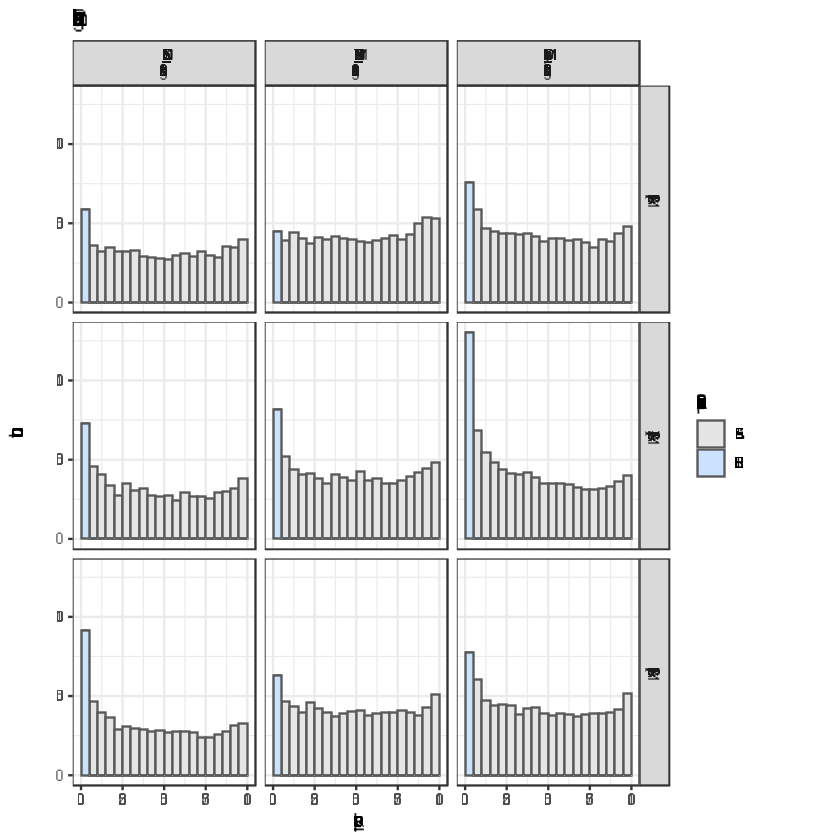

In [31]:
DE_info$celltype_de$de_output_tidy %>% head()

DE_info$hist_pvals

empirical_pval = FALSE

if(empirical_pval == TRUE){
  DE_info_emp = get_empirical_pvals(DE_info$celltype_de$de_output_tidy)
  celltype_de = DE_info_emp$de_output_tidy_emp %>% select(-p_val, -p_adj) %>%
    rename(p_val = p_emp, p_adj = p_adj_emp)
} else {
  celltype_de = DE_info$celltype_de$de_output_tidy
}

In [32]:
sender_receiver_de = combine_sender_receiver_de(
  sender_de = celltype_de,
  receiver_de = celltype_de,
  senders_oi = senders_oi,
  receivers_oi = receivers_oi,
  lr_network = lr_network
)

sender_receiver_de %>% head(20)

contrast,sender,receiver,ligand,receptor,lfc_ligand,lfc_receptor,ligand_receptor_lfc_avg,p_val_ligand,p_adj_ligand,p_val_receptor,p_adj_receptor
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M-(S+A)/2,M_Monocyte_CD16,M_Monocyte_CD16,C3,VSIG4,2.960,5.7600,4.36000,0.09640,0.439,0.001540,0.0923
M-(S+A)/2,M_Monocyte_CD16,M_Monocyte_CD16,IL10,IL10RB,5.610,0.7150,3.16250,0.00520,0.142,0.012300,0.2020
M-(S+A)/2,M_Monocyte_CD16,L_T_TIM3._CD38._HLADR.,IL18,IL18RAP,1.930,4.3900,3.16000,0.04450,0.321,0.000199,0.0560
M-(S+A)/2,M_Monocyte_CD16,L_T_TIM3._CD38._HLADR.,IL10,IL10RB,5.610,0.1840,2.89700,0.00520,0.142,0.557000,0.9500
M-(S+A)/2,L_NK_CD56._CD16.,L_T_TIM3._CD38._HLADR.,IL18,IL18RAP,1.290,4.3900,2.84000,0.00758,0.231,0.000199,0.0560
M-(S+A)/2,M_Monocyte_CD16,L_NK_CD56._CD16.,IL10,IL10RA,5.610,0.0393,2.82465,0.00520,0.142,0.814000,0.9960
M-(S+A)/2,M_Monocyte_CD16,L_T_TIM3._CD38._HLADR.,IL10,IL10RA,5.610,-0.0612,2.77440,0.00520,0.142,0.728000,0.9970
M-(S+A)/2,M_Monocyte_CD16,L_NK_CD56._CD16.,IL10,IL10RB,5.610,-0.0727,2.76865,0.00520,0.142,0.780000,0.9870
M-(S+A)/2,M_Monocyte_CD16,M_Monocyte_CD16,IL10,IL10RA,5.610,-0.3160,2.64700,0.00520,0.142,0.233000,0.6210


In [33]:
logFC_threshold = 0.50
p_val_threshold = 0.05

p_val_adj = FALSE

geneset_assessment = contrast_tbl$contrast %>%
  lapply(
    process_geneset_data,
    celltype_de, logFC_threshold, p_val_adj, p_val_threshold
  ) %>%
  bind_rows()
geneset_assessment

geneset_assessment_adjustedPval = contrast_tbl$contrast %>%
  lapply(
    process_geneset_data,
    celltype_de, logFC_threshold, p_val_adj = TRUE, p_val_threshold
    ) %>%
  bind_rows()
geneset_assessment_adjustedPval

Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`


cluster_id,n_background,n_geneset_up,n_geneset_down,prop_geneset_up,prop_geneset_down,in_range_up,in_range_down,contrast,logFC_threshold,p_val_threshold,adjusted
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<lgl>
L_NK_CD56._CD16.,6621,162,82,0.02446760,0.01238484,TRUE,TRUE,M-(S+A)/2,0.5,0.05,FALSE
L_T_TIM3._CD38._HLADR.,8461,401,194,0.04739393,0.02292873,TRUE,TRUE,M-(S+A)/2,0.5,0.05,FALSE
M_Monocyte_CD16,8817,647,438,0.07338097,0.04967676,TRUE,TRUE,M-(S+A)/2,0.5,0.05,FALSE
L_NK_CD56._CD16.,6621,150,219,0.02265519,0.03307657,TRUE,TRUE,S-(M+A)/2,0.5,0.05,FALSE
L_T_TIM3._CD38._HLADR.,8461,201,320,0.02375606,0.03782059,TRUE,TRUE,S-(M+A)/2,0.5,0.05,FALSE
M_Monocyte_CD16,8817,368,254,0.04173755,0.02880798,TRUE,TRUE,S-(M+A)/2,0.5,0.05,FALSE
L_NK_CD56._CD16.,6621,118,110,0.01782208,0.01661380,TRUE,TRUE,A-(S+M)/2,0.5,0.05,FALSE
L_T_TIM3._CD38._HLADR.,8461,225,150,0.02659260,0.01772840,TRUE,TRUE,A-(S+M)/2,0.5,0.05,FALSE
M_Monocyte_CD16,8817,262,464,0.02971532,0.05262561,TRUE,TRUE,A-(S+M)/2,0.5,0.05,FALSE


Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`


cluster_id,n_background,n_geneset_up,n_geneset_down,prop_geneset_up,prop_geneset_down,in_range_up,in_range_down,contrast,logFC_threshold,p_val_threshold,adjusted
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<lgl>
L_NK_CD56._CD16.,6621,7,0,0.0010572421,0.0000000000,FALSE,FALSE,M-(S+A)/2,0.5,0.05,TRUE
L_T_TIM3._CD38._HLADR.,8461,15,5,0.0017728401,0.0005909467,FALSE,FALSE,M-(S+A)/2,0.5,0.05,TRUE
M_Monocyte_CD16,8817,25,11,0.0028354316,0.0012475899,FALSE,FALSE,M-(S+A)/2,0.5,0.05,TRUE
L_NK_CD56._CD16.,6621,28,50,0.0042289684,0.0075517293,FALSE,TRUE,S-(M+A)/2,0.5,0.05,TRUE
L_T_TIM3._CD38._HLADR.,8461,2,5,0.0002363787,0.0005909467,FALSE,FALSE,S-(M+A)/2,0.5,0.05,TRUE
M_Monocyte_CD16,8817,10,15,0.0011341726,0.0017012589,FALSE,FALSE,S-(M+A)/2,0.5,0.05,TRUE
L_NK_CD56._CD16.,6621,36,19,0.0054372451,0.0028696572,TRUE,FALSE,A-(S+M)/2,0.5,0.05,TRUE
L_T_TIM3._CD38._HLADR.,8461,13,1,0.0015364614,0.0001181893,FALSE,FALSE,A-(S+M)/2,0.5,0.05,TRUE
M_Monocyte_CD16,8817,4,3,0.0004536690,0.0003402518,FALSE,FALSE,A-(S+M)/2,0.5,0.05,TRUE


In [37]:
write.csv(geneset_assessment_adjustedPval,'gene_assessment_adj_pval.csv',quote=FALSE,row.names=TRUE)
write.csv(geneset_assessment,'gene_assessment.csv',quote=FALSE,row.names=TRUE)

In [34]:
top_n_target = 250

verbose = TRUE
cores_system = 8
n.cores = min(cores_system, celltype_de$cluster_id %>% unique() %>% length())

ligand_activities_targets_DEgenes = suppressMessages(suppressWarnings(
  get_ligand_activities_targets_DEgenes(
    receiver_de = celltype_de,
    receivers_oi = intersect(receivers_oi, celltype_de$cluster_id %>% unique()),
    ligand_target_matrix = ligand_target_matrix,
    logFC_threshold = logFC_threshold,
    p_val_threshold = p_val_threshold,
    p_val_adj = p_val_adj,
    top_n_target = top_n_target,
    verbose = verbose,
    n.cores = n.cores
  )
))

ligand_activities_targets_DEgenes$ligand_activities %>% head(20)


ligand,activity,contrast,target,ligand_target_weight,receiver,direction_regulation,activity_scaled
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<fct>,<dbl>
A2M,0.02821706,M-(S+A)/2,ACOT7,0.006322231,L_NK_CD56._CD16.,up,0.7944928
A2M,0.02821706,M-(S+A)/2,AREG,0.006377327,L_NK_CD56._CD16.,up,0.7944928
A2M,0.02821706,M-(S+A)/2,CD55,0.006489555,L_NK_CD56._CD16.,up,0.7944928
A2M,0.02821706,M-(S+A)/2,CD74,0.006335980,L_NK_CD56._CD16.,up,0.7944928
A2M,0.02821706,M-(S+A)/2,FKBP5,0.007233506,L_NK_CD56._CD16.,up,0.7944928
A2M,0.02821706,M-(S+A)/2,FOS,0.014614502,L_NK_CD56._CD16.,up,0.7944928
A2M,0.02821706,M-(S+A)/2,GADD45A,0.011025226,L_NK_CD56._CD16.,up,0.7944928
A2M,0.02821706,M-(S+A)/2,H2AC6,0.007469076,L_NK_CD56._CD16.,up,0.7944928
A2M,0.02821706,M-(S+A)/2,H2BC12,0.006918689,L_NK_CD56._CD16.,up,0.7944928


In [36]:
write.csv(ligand_activities_targets_DEgenes$ligand_activities,'ligand_activities.csv',quote=FALSE,row.names=TRUE)

In [35]:
multinichenet_output = multi_nichenet_analysis(
  sce = sce, 
  celltype_id = 'celltype', sample_id = 'batch', group_id = 'batch', 
  batches = batches, covariates = covariates, 
  lr_network = lr_network, ligand_target_matrix = ligand_target_matrix, 
  contrasts_oi = contrasts_oi, contrast_tbl = contrast_tbl, 
  senders_oi = senders_oi, receivers_oi = receivers_oi,
  min_cells = min_cells, 
  fraction_cutoff = fraction_cutoff, 
  min_sample_prop = min_sample_prop,
  scenario = scenario, 
  ligand_activity_down = ligand_activity_down,
  logFC_threshold = logFC_threshold, 
  p_val_threshold = p_val_threshold, 
  p_val_adj = p_val_adj, 
  empirical_pval = empirical_pval, 
  top_n_target = top_n_target, 
  n.cores = n.cores, 
  verbose = TRUE
  )
## [1] "Make diagnostic abundance plots + define expressed genes"
## [1] "condition-specific celltypes:"
## character(0)
## [1] "absent celltypes:"
## character(0)
## [1] "Samples are considered if they have more than 10 cells of the cell type of interest"
## [1] "Genes with non-zero counts in at least 5% of cells of a cell type of interest in a particular sample will be considered as expressed in that sample."
## [1] "Genes expressed in at least 2.5 samples will considered as expressed in the cell type: L_NK_CD56._CD16."
## [1] "Genes expressed in at least 2.5 samples will considered as expressed in the cell type: L_T_TIM3._CD38._HLADR."
## [1] "Genes expressed in at least 2.5 samples will considered as expressed in the cell type: M_Monocyte_CD16"
## [1] "6010 genes are considered as expressed in the cell type: L_NK_CD56._CD16."
## [1] "7589 genes are considered as expressed in the cell type: L_T_TIM3._CD38._HLADR."
## [1] "7798 genes are considered as expressed in the cell type: M_Monocyte_CD16"
## [1] "Calculate differential expression for all cell types"
## [1] "DE analysis is done:"
## [1] "included cell types are:"
## [1] "L_T_TIM3._CD38._HLADR." "L_NK_CD56._CD16."       "M_Monocyte_CD16"       
## [1] "retained cell types"
## [1] "L_T_TIM3._CD38._HLADR." "L_NK_CD56._CD16."       "M_Monocyte_CD16"       
## [1] "Calculate normalized average and pseudobulk expression"
## [1] "Calculate NicheNet ligand activities and ligand-target links"
## [1] "Combine all the information in prioritization tables"
## [1] "Calculate correlation between LR pairs and target genes"
## [1] "There are no condition specific cell types in the data. MultiNicheNet analysis is performed in the regular way for all cell types."

ERROR: Error in multi_nichenet_analysis(sce = sce, celltype_id = "celltype", : celltype_id should be a column name in the metadata dataframe of sce
